# ICOS FLUXNET data

ICOS (Integrated Carbon Observation System, https://www.icos-cp.eu/) provides eddy-covariance measurements from flux towers in whole Europe. <br>
Here we use measurements of 67 stations in 2020 (whole year). In this notebook:
- data exploration (percentiles)
- average seasonal cycle
- average diurnal cycle

In [25]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd
import numpy as np
import glob
import metview as mv
import xarray as xr
import pytz
import datetime
import timezonefinder
from timezonefinder import TimezoneFinder
execfile("utils.py")
%matplotlib inline

In [3]:
#obs data
dir="/home/lauracma/Documents/ecmwf_proj/data/ISMN_data/in_situ_data/pre_processed_data/ICOS_FLUXNET/2020/"

#meta data ICOS stations 2020
meta=np.loadtxt("/home/lauracma/Documents/ecmwf_proj/data/ISMN_data/in_situ_data/pre_processed_data/station_info/ICOS_FLUXNET/station_coords_2020",str, comments="%", skiprows=1)
nstations=np.shape(meta)[0]
meta

array([['BE-Bra', '51.30761', '4.51984', '16', 'Cfb', '3'],
       ['BE-Vie', '50.304962', '5.998099', '490', 'Cfb', '18'],
       ['DE-Tha', '50.96256', '13.56515', '380', 'Cfb', '3'],
       ['DK-Sor', '55.48587', '11.644645', '40', 'Cfb', '5'],
       ['FI-Hyy', '61.84741', '24.29477', '181', 'Dfc', '3'],
       ['CH-Dav', '46.81533', '9.85591', '1689', 'Dfc', '3'],
       ['RU-Fyo', '56.461528', '32.922083', '274', 'Dfc', '3'],
       ['IT-Ren', '46.58686', '11.43369', '1735', 'Dfc', '3'],
       ['DE-Hai', '51.079407', '10.452089', '438', 'Dfb', '6'],
       ['IL-Yat', '31.345045', '35.051989', '657', 'Dfb', '6'],
       ['DE-Geb', '51.09973', '10.91463', '161', 'Cfb', '1'],
       ['SE-Deg', '64.18203', '19.55654', '270', 'Dfc', '13'],
       ['IT-Lav', '45.9562', '11.28132', '1355', 'Dfc', '3'],
       ['BE-Lon', '50.55162', '4.746234', '170', 'Cfb', '1'],
       ['CH-Lae', '47.47808', '8.365', '689', 'Dfc', '3'],
       ['CH-Oe2', '47.28631', '7.73433', '452', 'Dfb', '1'],
    

## Percentiles

In [4]:
dat=pd.read_pickle(dir+"ICOS_FLUXNET_50.9626_13.5651_obs_2020")
dat

,LE_CORR,LE_CORR_25,LE_CORR_75,H_CORR,H_CORR_25,H_CORR_75
2020-01-01 00:00:00,-0.867297,-1.28115,-0.447227,-13.3030,-19.6508,-6.85977
2020-01-01 00:30:00,-2.405270,-3.58721,-1.252240,-22.6518,-33.7829,-11.79300
2020-01-01 01:00:00,0.647573,0.33714,0.965788,-18.5151,-27.7910,-9.70139
2020-01-01 01:30:00,-0.933518,-1.40934,-0.492171,-12.2804,-18.5398,-6.47447
2020-01-01 02:00:00,-0.777633,-1.17400,-0.409984,-18.4532,-27.8589,-9.72891
...,...,...,...,...,...,...
2020-12-31 21:30:00,-4.086570,NaN,NaN,-41.6566,NaN,NaN
2020-12-31 22:00:00,-2.309320,NaN,NaN,-42.4302,NaN,NaN
2020-12-31 22:30:00,-1.571730,NaN,NaN,-50.5211,NaN,NaN
2020-12-31 23:00:00,-1.571310,NaN,NaN,-50.5091,NaN,NaN


Text(0.5, 1.0, 'example percentiles')

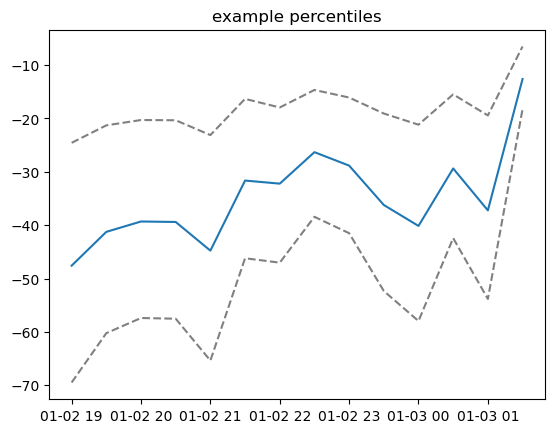

In [5]:
plt.plot(dat["H_CORR"][86:100])
plt.plot(dat["H_CORR_25"][86:100],color="gray",linestyle="dashed")
plt.plot(dat["H_CORR_75"][86:100],color="gray",linestyle="dashed")
plt.title("example percentiles")

Shows exemplarily that H_CORR is the median, H_CORR_25 the 25% quartile and H_CORR_75 the 75% quartile. Same for LE_CORR. Would allow for deriving information about skewness as well.

## Average seasonal cycle

Text(0.5, 0, 'month')

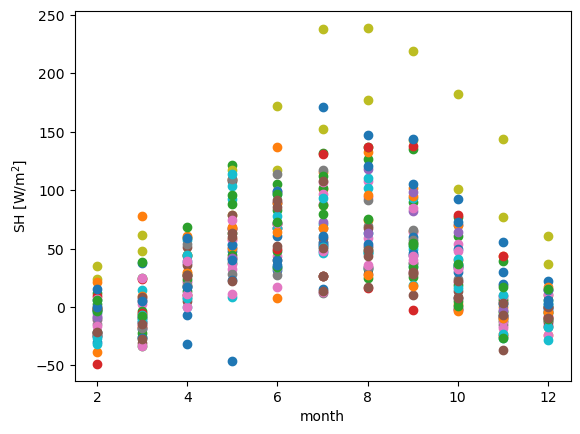

In [22]:
mons=np.linspace(1,12,12)
for i in range(nstations):
    try:
        file=glob.glob(dir+"/ICOS_FLUXNET_"+str(round(float(meta[i,1]),4))+"*"+str(round(float(meta[i,2]),4))+"*")
        tmp=pd.read_pickle(file[0])
        sh_obs=tmp["H_CORR"]
        plt.plot(mons,mean_seasonal_cycle(sh_obs),"o",label=i)
    except:
        continue
plt.ylabel(r"SH [W/m$^2$]")
plt.xlabel("month")

Text(0.5, 0, 'month')

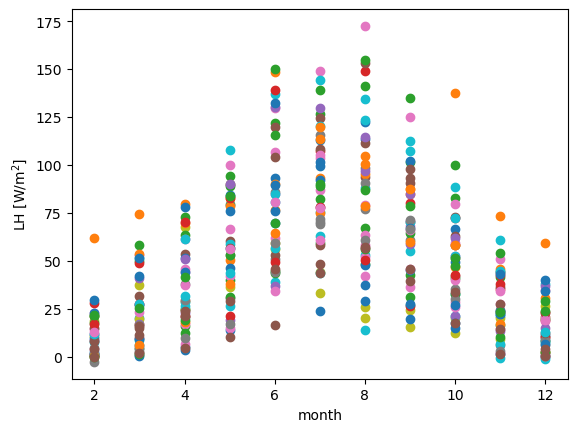

In [24]:
mons=np.linspace(1,12,12)
for i in range(nstations):
    try:
        file=glob.glob(dir+"/ICOS_FLUXNET_"+str(round(float(meta[i,1]),4))+"*"+str(round(float(meta[i,2]),4))+"*")
        tmp=pd.read_pickle(file[0])
        lh_obs=tmp["LE_CORR"]
        plt.plot(mons,mean_seasonal_cycle(lh_obs),"o",label=i)
    except:
        continue
plt.ylabel(r"LH [W/m$^2$]")
plt.xlabel("month")

## Average diurnal cycle

Text(0.5, 0, 'hour')

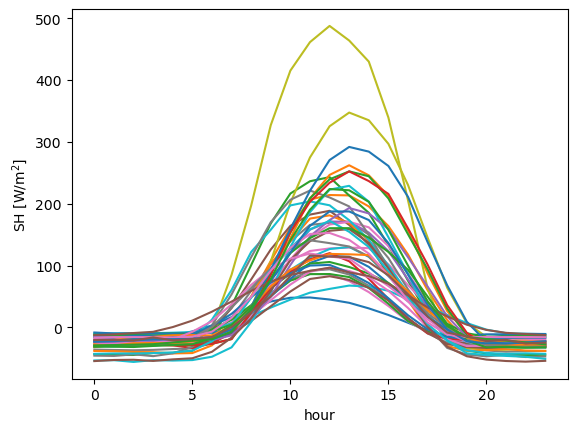

In [26]:
for i in range(nstations):
    try:
        file=glob.glob(dir+"/ICOS_FLUXNET_"+str(round(float(meta[i,1]),4))+"*"+str(round(float(meta[i,2]),4))+"*")
        tmp=pd.read_pickle(file[0])
        sh_obs=tmp["H_CORR"]
        plt.plot(mean_diurnal_cycle(sh_obs[::2]),label=i)
    except:
        continue
plt.ylabel(r"SH [W/m$^2$]")
plt.xlabel("hour")

Text(0.5, 0, 'hour')

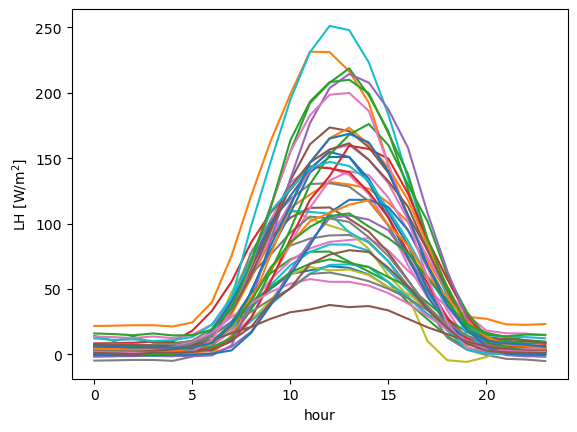

In [27]:
for i in range(nstations):
    try:
        file=glob.glob(dir+"/ICOS_FLUXNET_"+str(round(float(meta[i,1]),4))+"*"+str(round(float(meta[i,2]),4))+"*")
        tmp=pd.read_pickle(file[0])
        lh_obs=tmp["LE_CORR"]
        plt.plot(mean_diurnal_cycle(lh_obs[::2]),label=i)
    except:
        continue
plt.ylabel(r"LH [W/m$^2$]")
plt.xlabel("hour")